In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True) # dropping rows with null values

In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
train_data = x_train.join(y_train)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

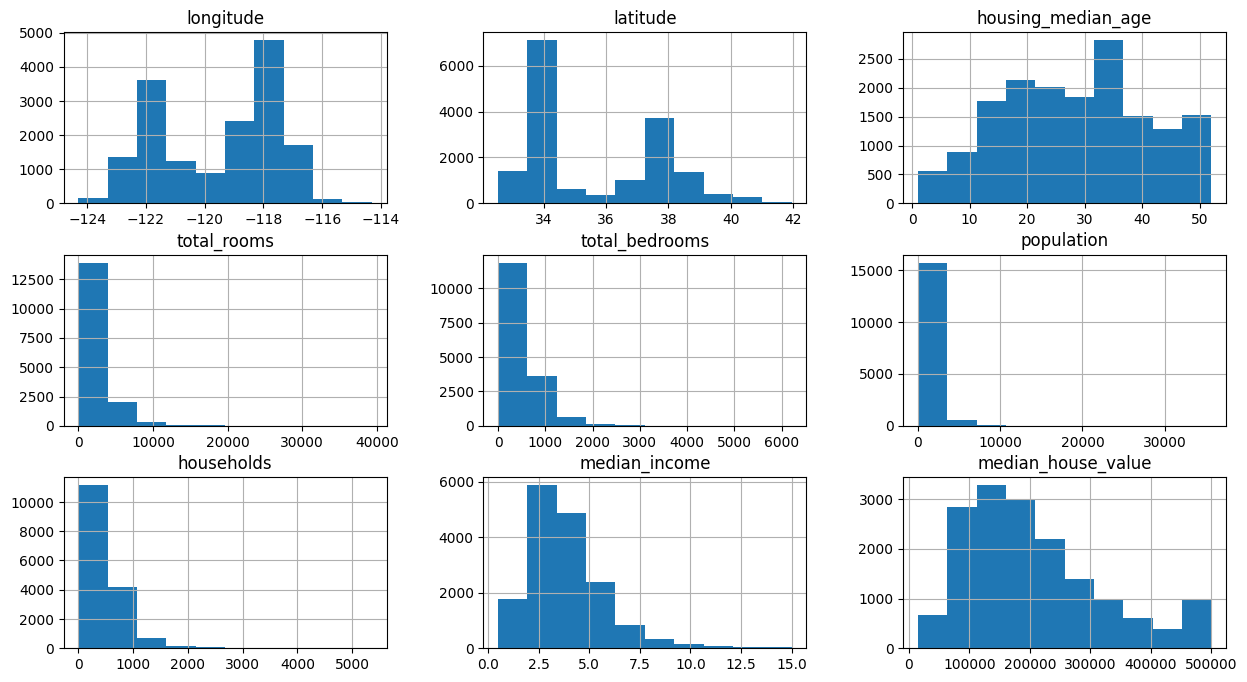

In [9]:
train_data.hist(figsize=(15, 8))

<AxesSubplot: >

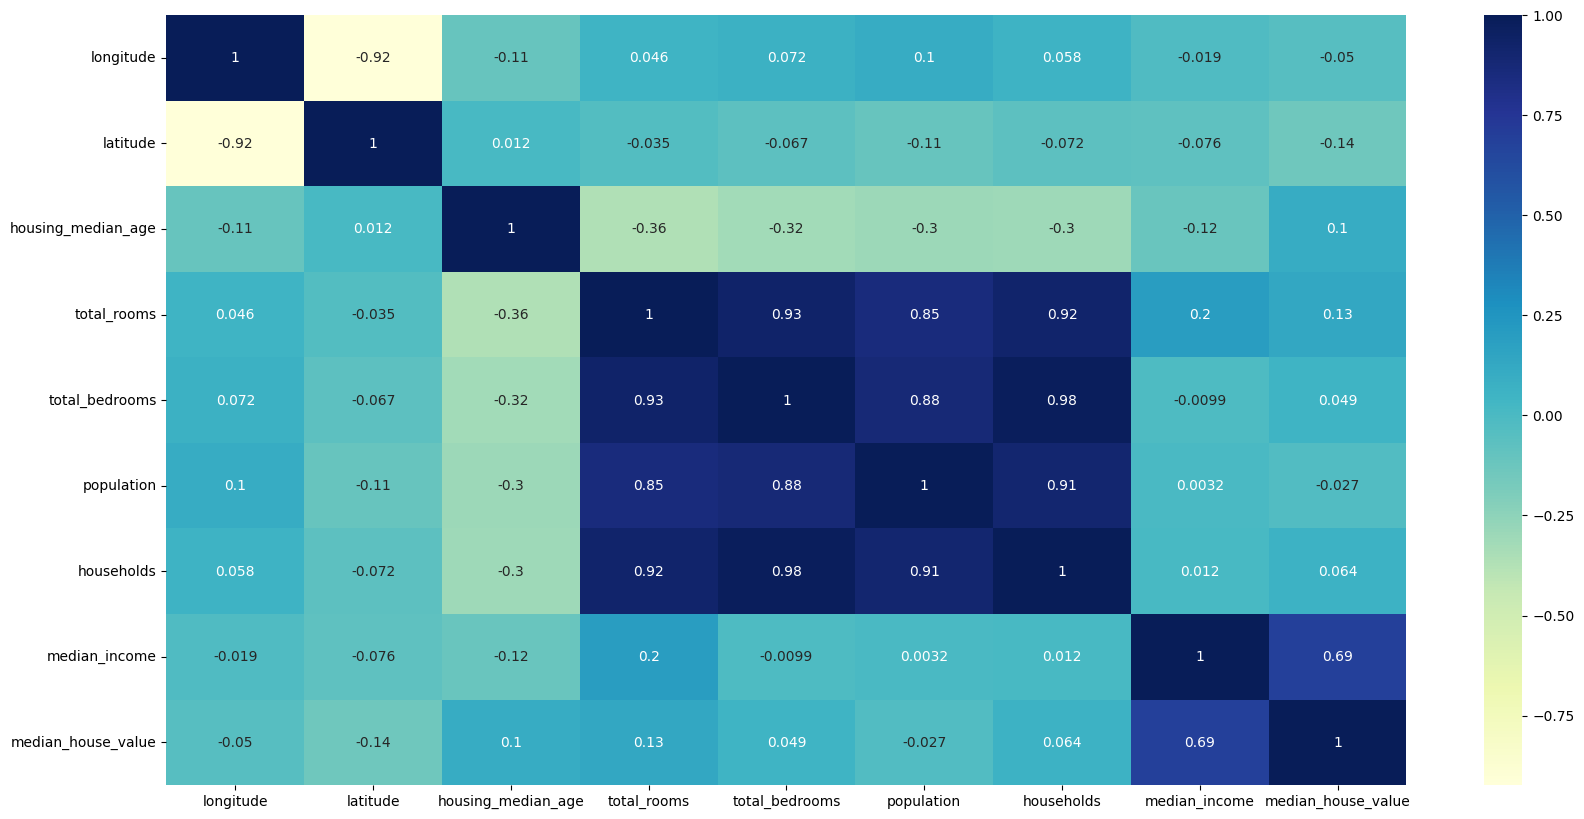

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [11]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

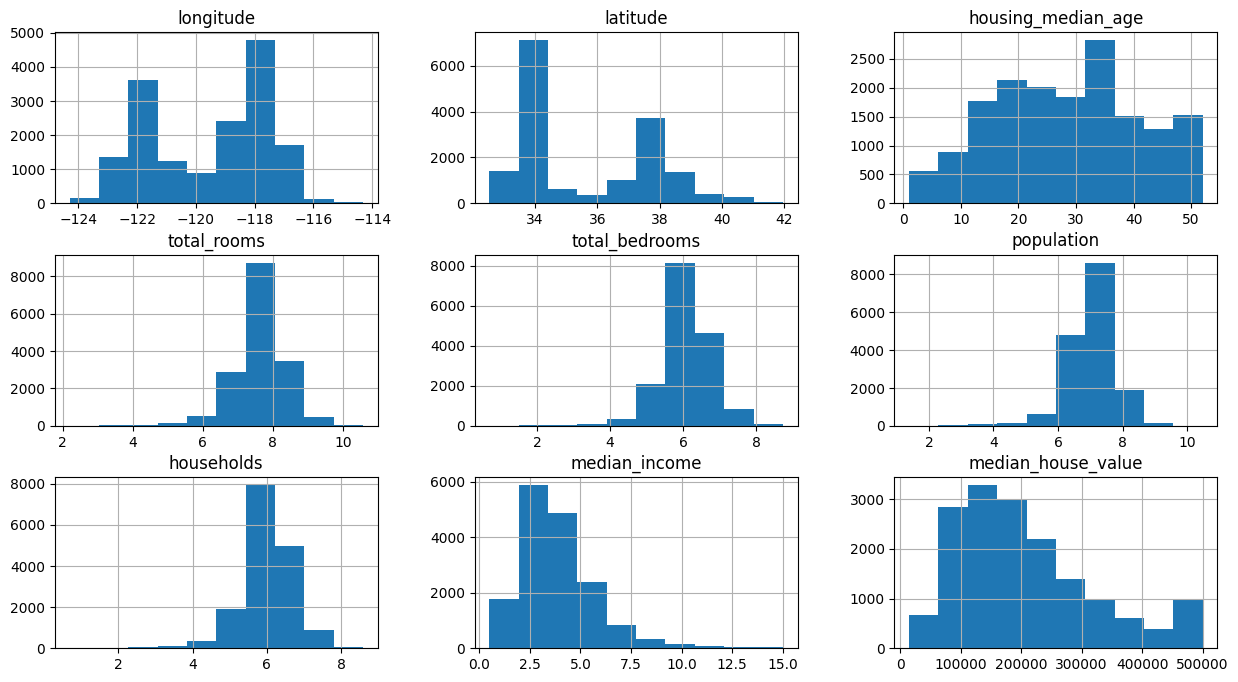

In [12]:
train_data.hist(figsize=(15, 8))

In [13]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7248
INLAND        5192
NEAR OCEAN    2080
NEAR BAY      1823
ISLAND           3
Name: ocean_proximity, dtype: int64

In [14]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1040,0,1,0,0,0
16998,0,0,0,1,0
11303,1,0,0,0,0
2967,0,1,0,0,0
17103,0,0,0,0,1
...,...,...,...,...,...
3637,1,0,0,0,0
1078,0,1,0,0,0
12978,0,1,0,0,0
7340,1,0,0,0,0


In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1040,-120.87,38.37,28.0,8.293800,6.641182,7.387090,6.549651,2.8125,113400.0,0,1,0,0,0
16998,-122.27,37.54,16.0,8.272315,6.338594,7.469084,6.324359,7.3644,419700.0,0,0,0,1,0
11303,-117.95,33.78,9.0,8.175829,6.943122,7.609862,6.894670,2.9726,133800.0,1,0,0,0,0
2967,-119.12,35.33,4.0,9.056606,7.306531,8.354910,7.275865,5.1036,103400.0,0,1,0,0,0
17103,-122.23,37.45,34.0,8.337588,6.584791,7.369601,6.493754,5.0457,395100.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,-118.44,34.23,36.0,7.456455,5.961005,7.003065,5.869297,4.0368,183100.0,1,0,0,0,0
1078,-121.78,39.71,8.0,4.948760,3.367296,4.442651,3.401197,2.1250,179200.0,0,1,0,0,0
12978,-121.29,38.68,12.0,8.536800,6.998510,7.615791,6.971669,3.5444,132500.0,0,1,0,0,0
7340,-118.16,33.97,30.0,7.791523,6.573680,8.073715,6.579251,2.1743,176000.0,1,0,0,0,0


<AxesSubplot: >

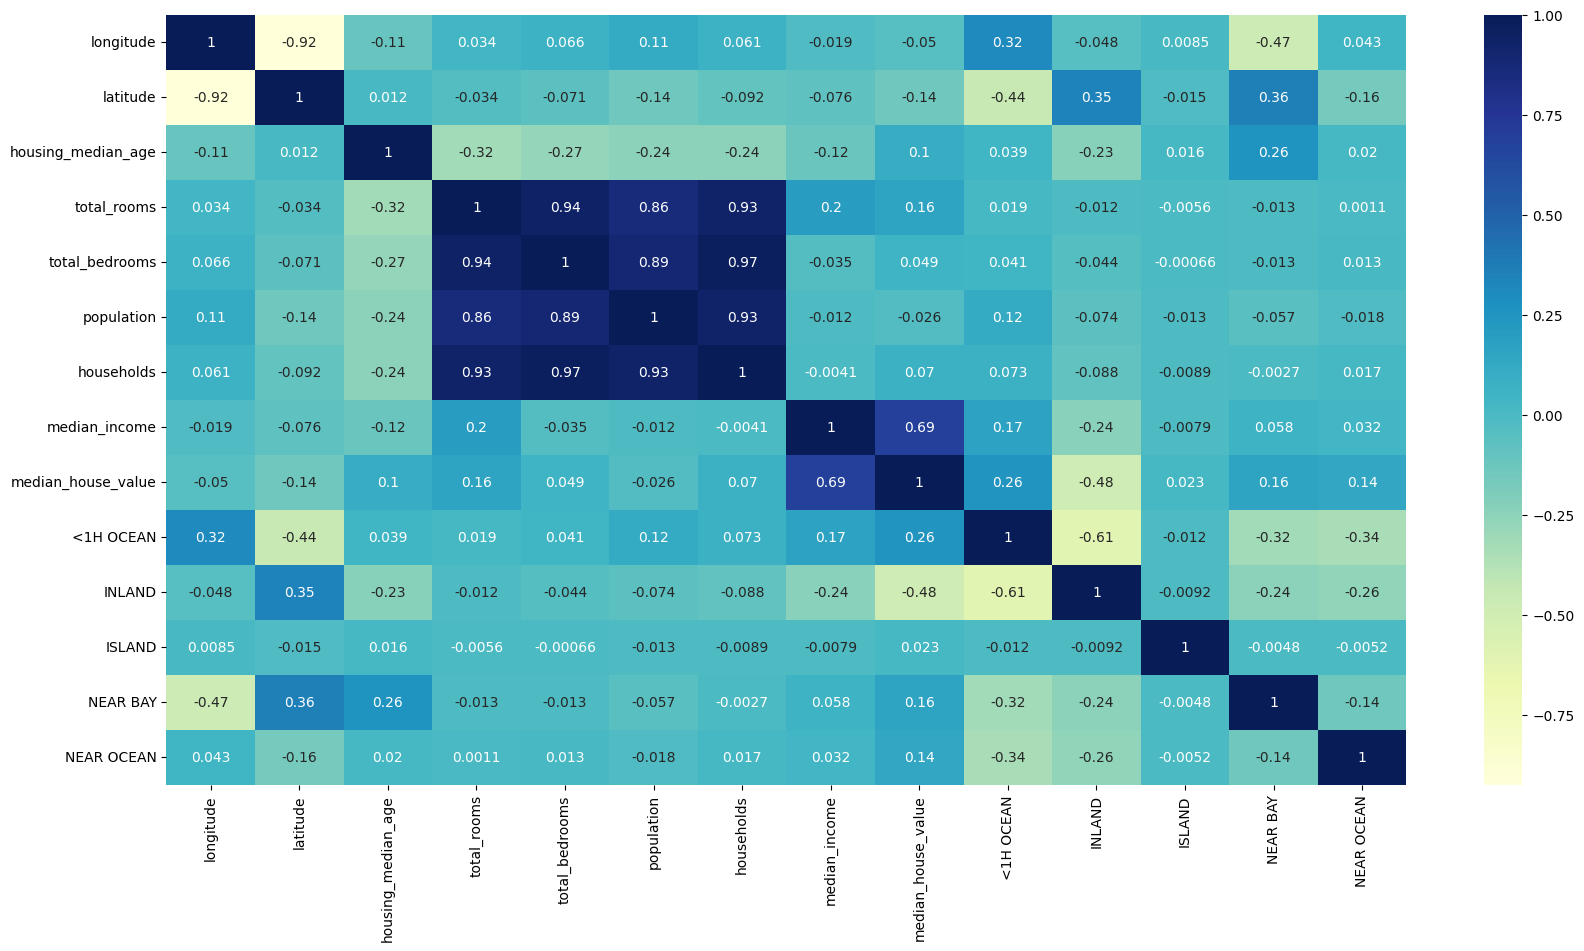

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

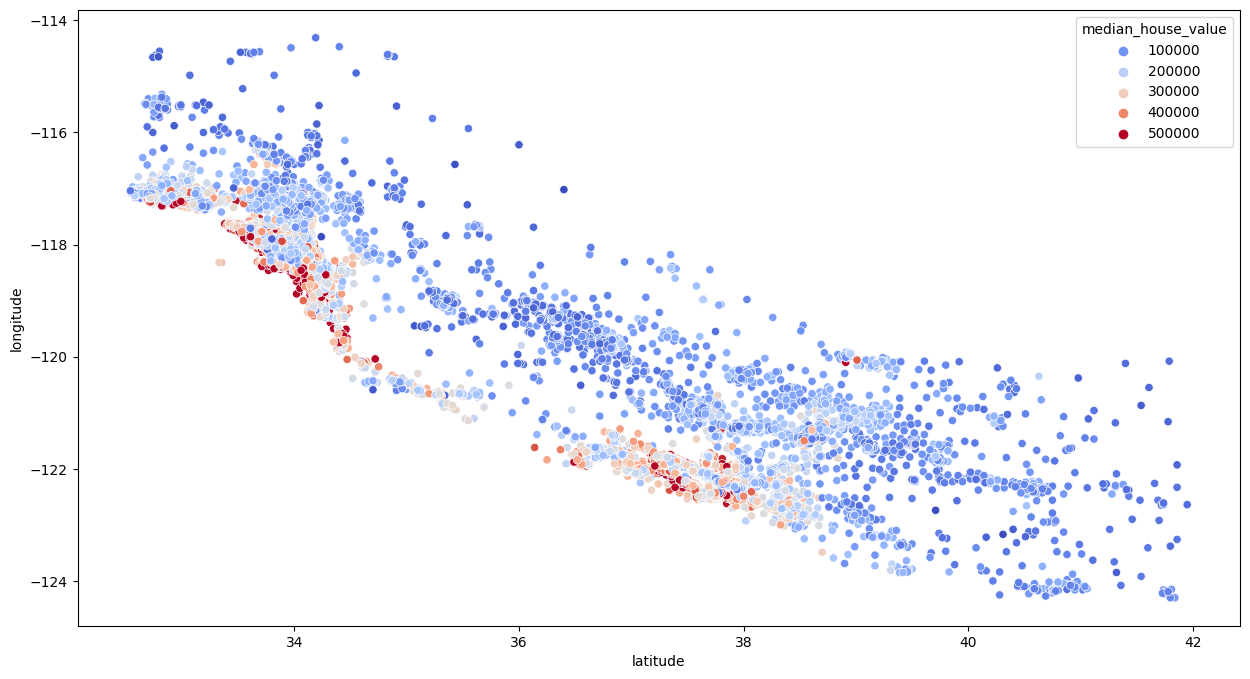

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [19]:
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<AxesSubplot: >

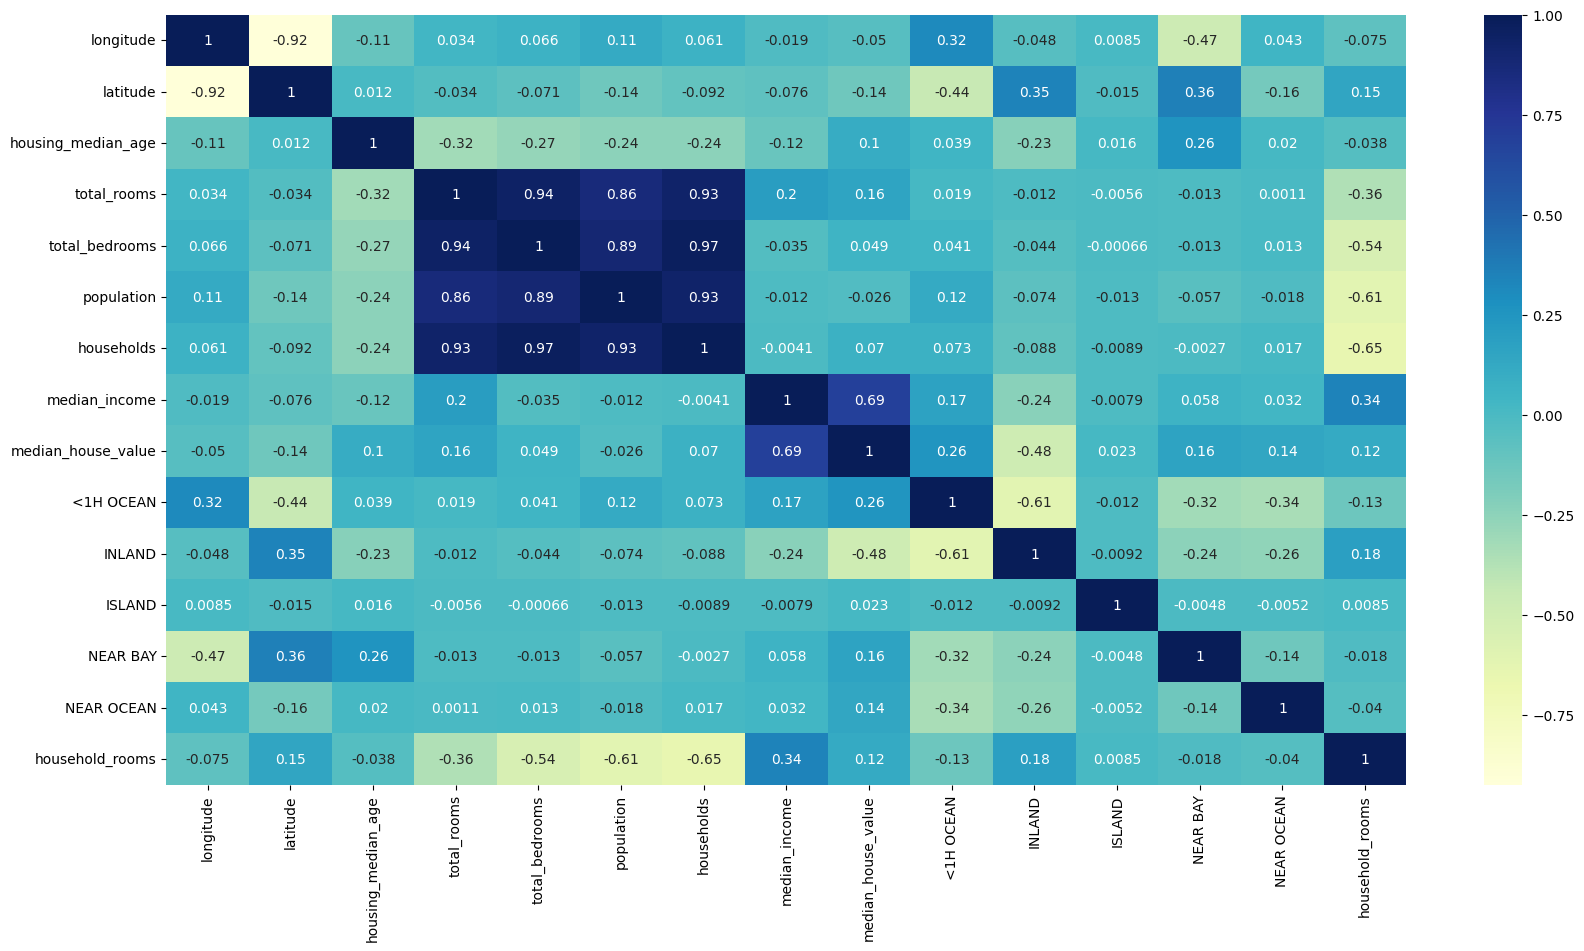

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [21]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [23]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [24]:
reg.score(x_test, y_test)

0.6719764837044959

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test, y_test)

0.8223767447748077